<a href="https://colab.research.google.com/github/baileymccluresinger/UAPP706_2024/blob/main/UAPP706_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [185]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

zplan = pd.read_csv("https://github.com/baileymccluresinger/UAPP706_2024/blob/main/Combined%20Data(Z).csv?raw=true", encoding='unicode_escape')

lplan = pd.read_csv("https://github.com/baileymccluresinger/UAPP706_2024/blob/main/Combined%20Data(L).csv?raw=true", encoding='unicode_escape')

replan = pd.read_csv("https://github.com/baileymccluresinger/UAPP706_2024/blob/main/Combined%20Data(Reconciled).csv?raw=true", encoding='unicode_escape')

In [186]:
rescore = replan.iloc[3:]
rescore['Code Total'] = rescore['Code Total'].astype(float);
rescore

<ipython-input-186-c2bbcfa4f53e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rescore['Code Total'] = rescore['Code Total'].astype(float);


,Section,Description,Code,Prescriptivity,Code Total,Pres. Total
3,1.0g,Plan update,1.0,NaN,1.0,NaN
4,1.0l,Consultant used for plan prep,1.0,NaN,1.0,NaN
5,1.0m,Consultant used for plan compilation,1.0,NaN,1.0,NaN
6,2.1a,Table of contents,1.0,NaN,1.0,NaN
7,2.1b,Glossary of terms,1.0,NaN,1.0,NaN
...,...,...,...,...,...,...
521,11.6,Joint planning commission,0.0,NaN,1.0,NaN
522,11.7,Joint zoning board,0.0,NaN,1.0,NaN
523,11.8,Joint infrastructure agreements e.g. shared wa...,0.0,NaN,1.0,NaN
524,11.9,Other joint plans (e.g. non-motorized transpor...,0.0,NaN,1.0,NaN


In [187]:
#removing excess rows
lplan = lplan.iloc[:526]

#creating array from Code column in dataframe
zcode = np.asarray(zplan['Code'])
zcode = np.nan_to_num(zcode, nan=0)
lcode = np.asarray(lplan['Code'])
lcode = np.nan_to_num(lcode, nan=0)
recode = np.asarray(replan['Code'])
recode = np.nan_to_num(recode, nan=0)

#checking shape of dataframes
zplan.shape

(526, 6)

##**Paired T-Test of Lorren and Zhifu's Codes**
---

####**Paired t-test performs test of mean difference for related samples.**

####**Null Hypothesis:** The related sample codes are equal.
#### _$H_0$_ : $\\{P_{\\\\{L}}}$  $=$ $\\{P_{\\\\{Z}}}$
####**Alternative Hypothesis:** The related sample codes are inequal.
#### _$H_A$_ : $\\{P_{\\\\{L}}}$  $\neq$ $\\{P_{\\\\{Z}}}$
####**Significance Threshold:** $\alpha$ $=$ $0.05$

In [188]:
#paired sample t-test
t_statistic, p_value = stats.ttest_rel(zcode, lcode)
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 5.503231898598037
P-value: 5.8383595124462606e-08


####**The test statistic is approximately *5.503*.**
####**The two-sided p-value is approximately *0.00000005838*.**
####$p$ $=$ $5.838e-08$
####**Our p-value, *5.838e-08*, is signficantly smaller than the significance threshold, *0.05*, so we can reject the null hypothesis. This indicates that the true mean test score is different for Lorren's code and Zhifu's code, so there is a statistically significant difference.**


##**Independent Samples T-Test of Lorren and Zhifu's Codes**
---

####**Independent samples t-test performs test of mean difference for independent samples.**

####**Null Hypothesis:** The independent sample codes have identical average (expected) values.
#### _$H_0$_ : $\\{P_{\\\\{L}}}$  $=$ $\\{P_{\\\\{Z}}}$
####**Alternative Hypothesis:** The independent sample codes do not have identical average (expected) values.
#### _$H_A$_ : $\\{P_{\\\\{L}}}$  $\neq$ $\\{P_{\\\\{Z}}}$
####**Significance Threshold:** $\alpha$ $=$ $0.05$

In [189]:
t_statistic, p_value = ttest_ind(zcode, lcode)
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 1.5394528149175282
P-value: 0.12399507737972727


####**The test statistic is approximately *1.539*.**
####**The two-sided p-value is approximately *0.124*.**
####$p$ $=$ $0.124$
####**Our p-value, *0.124*, is larger than the significance threshold, *0.05*, so we cannot reject the null hypothesis. This indicates that Lorren's code and Zhifu's code are drawn from the same population with the same population mean.**

In [190]:
zshaped = np.reshape(zcode, (-1, 2))
reshaped = np.reshape(recode, (-1, 2))

model = LinearRegression().fit(reshaped, zshaped)
y_predicted = model.predict(reshaped)

#print("Observed values:", zshaped)
#print("Predicted values:", y_predicted)

##**Standard Linear Regression Test of Lorren and Zhifu's Codes with Reconciled Code**
---

####**Standard linear regression estimates the relationship between quantitative variables, observed and expected values, and calculates how strong the relationsip is between the two variables.**

In [191]:
slope, intercept, r, p, std_err = stats.linregress(zcode, recode)

r

0.954217167427634

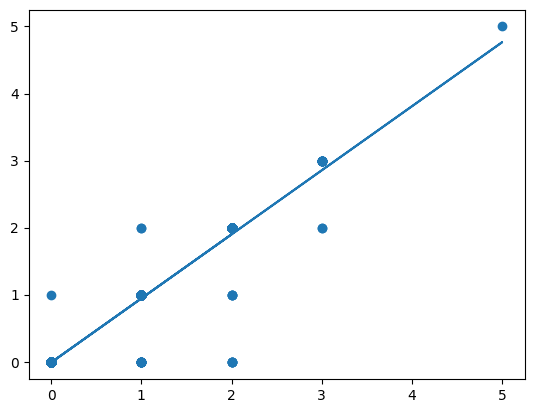

In [192]:
def myfunc(zcode):
  return slope * zcode + intercept

mymodel = list(map(myfunc, zcode))

plt.scatter(zcode, recode)
plt.plot(zcode, mymodel)
plt.show()

In [193]:
slope, intercept, r, p, std_err = stats.linregress(lcode, recode)

r

0.9545628043431753

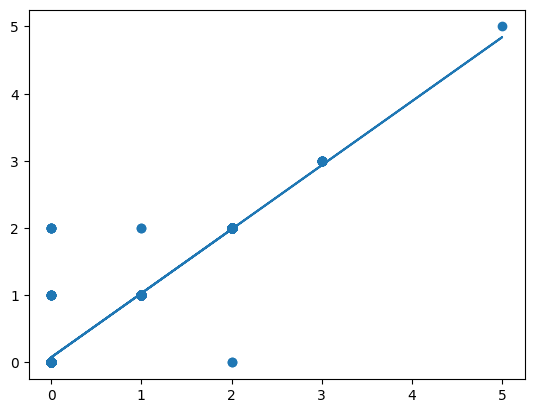

In [194]:
def myfunc(lcode):
  return slope * lcode + intercept

mymodel = list(map(myfunc, lcode))

plt.scatter(lcode, recode)
plt.plot(lcode, mymodel)
plt.show()

##**Category Scoring**
---

In [195]:
#calculating total code score
recode_sum = int(rescore['Code'].sum())
code_total = int(rescore['Code Total'].sum())
code_score = recode_sum/code_total
code_score

0.44007670182166825

###**Category 1: General Information**

In [196]:
cat1 = rescore.iloc[0:3]
cat1

,Section,Description,Code,Prescriptivity,Code Total,Pres. Total
3,1.0g,Plan update,1.0,NaN,1.0,NaN
4,1.0l,Consultant used for plan prep,1.0,NaN,1.0,NaN
5,1.0m,Consultant used for plan compilation,1.0,NaN,1.0,NaN


In [197]:
cat1_sum = int(cat1['Code'].sum())
cat1_total = int(cat1['Code Total'].sum())
cat1_score = cat1_sum/cat1_total
cat1_score

1.0

###**Category 2: Plan Presentation**

In [198]:
cat2 = rescore.iloc[3:14]
cat2

,Section,Description,Code,Prescriptivity,Code Total,Pres. Total
6,2.1a,Table of contents,1.0,NaN,1.0,NaN
7,2.1b,Glossary of terms,1.0,NaN,1.0,NaN
8,2.1c,Index,0.0,NaN,1.0,NaN
9,2.1d,Executive summary,0.0,NaN,1.0,NaN
10,2.1e,Sources in text/tables,1.0,NaN,1.0,NaN
11,2.1f,Source list provided,0.0,NaN,1.0,NaN
12,2.1g,Use / quality of maps[1],3.0,NaN,3.0,NaN
13,2.1h,Use / quality of tables / figures (readability...,3.0,NaN,3.0,NaN
14,2.1i,Readability of text[2],2.0,NaN,2.0,NaN
15,2.2a,"Clear statement of goals, policies, and object...",1.0,NaN,1.0,NaN


In [199]:
cat2_sum = int(cat2['Code'].sum())
cat2_total = int(cat2['Code Total'].sum())
cat2_score = cat2_sum/cat2_total
cat2_score

0.7727272727272727

###**Category 3: Planning Process**

In [200]:
cat3 = rescore.iloc[14:68]
#cat3

In [201]:
cat3_sum = int(cat3['Code'].sum())
cat3_total = int(cat3['Code Total'].sum())
cat3_score = cat3_sum/cat3_total
cat3_score

0.5945945945945946

###**Category 4: Data Collection and Analysis**

In [202]:
cat4 = rescore.iloc[68:88]
#cat4

In [203]:
cat4_sum = int(cat4['Code'].sum())
cat4_total = int(cat4['Code Total'].sum())
cat4_score = cat4_sum/cat4_total
cat4_score

0.7419354838709677

###**Category 5: Infrastructure, Facilities, and Services**

In [204]:
cat5 = rescore.iloc[88:269]
cat5

,Section,Description,Code,Prescriptivity,Code Total,Pres. Total
91,5A.1.1a,Transit (availability of),1.0,NaN,2.0,NaN
92,5A.1.1b,Transit (access to),1.0,NaN,2.0,NaN
93,5A.1.1c,Transportation justice,1.0,NaN,3.0,NaN
94,5A.1.1d,Auto / Roadway system quality,1.0,NaN,3.0,NaN
95,5A.1.1e,Non motorized Transportation (availability of),3.0,NaN,3.0,NaN
...,...,...,...,...,...,...
267,5B.5.9,Heritage tourism,2.0,2.0,2.0,2.0
268,5B.5.10,TDR for historic preservation,0.0,NaN,2.0,2.0
269,5B.5.11,Corridor design guidelines,2.0,2.0,2.0,2.0
270,5B.5.12,Regional design guidelines,0.0,NaN,2.0,2.0


In [205]:
cat5_sum = int(cat5['Code'].sum())
cat5_total = int(cat5['Code Total'].sum())
cat5_score = cat5_sum/cat5_total
cat5_score

0.5129533678756477

###**Category 6: Economic Development**

In [206]:
cat6 = rescore.iloc[269:322]
#cat6

In [207]:
cat6_sum = int(cat6['Code'].sum())
cat6_total = int(cat6['Code Total'].sum())
cat6_score = cat6_sum/cat6_total
cat6_score

0.28846153846153844

###**Category 7: Resource Protection**

In [208]:
cat7 = rescore.iloc[322:462]
cat7

,Section,Description,Code,Prescriptivity,Code Total,Pres. Total
325,7A.1,Land cover,0.0,NaN,3.0,NaN
326,7A.2,Land use incompatibilities,0.0,NaN,3.0,NaN
327,7A.3,Population projection linked to natural resources,0.0,NaN,2.0,NaN
328,7A.4,Tree canopy cover,3.0,NaN,3.0,NaN
329,7A.5,Air pollution,2.0,NaN,3.0,NaN
...,...,...,...,...,...,...
460,7B.5b,Adoption of state dune and wetland protection ...,0.0,NaN,2.0,2.0
461,7B.5c,Public education on coastal management,0.0,NaN,2.0,2.0
462,7B.5d,Public access/use restrictions,0.0,NaN,2.0,2.0
463,7B.5e,"Preserve existing vegetation, rocks and berms ...",0.0,NaN,2.0,2.0


In [209]:
cat7_sum = int(cat7['Code'].sum())
cat7_total = int(cat7['Code Total'].sum())
cat7_score = cat7_sum/cat7_total
cat7_score

0.26006191950464397

###**Category 8: Coordination**

In [210]:
cat8 = rescore.iloc[462:480]
#cat8

In [211]:
cat8_sum = int(cat8['Code'].sum())
cat8_total = int(cat8['Code Total'].sum())
cat8_score = cat8_sum/cat8_total
cat8_score

0.5555555555555556

###**Category 9: Consistency**

In [212]:
cat9 = rescore.iloc[480:502]
#cat9

In [213]:
cat9_sum = int(cat9['Code'].sum())
cat9_total = int(cat9['Code Total'].sum())
cat9_score = cat9_sum/cat9_total
cat9_score

0.6976744186046512

###**Category 10: Implementation Procedures**

In [214]:
cat10 = rescore.iloc[502:513]
cat10

,Section,Description,Code,Prescriptivity,Code Total,Pres. Total
505,10.1,Timetable for implementation,1.0,NaN,1.0,NaN
506,10.2,Implementation responsibilities,1.0,NaN,1.0,NaN
507,10.3,Implementation mechanisms,1.0,NaN,1.0,NaN
508,10.4,"Land use regulations, subdivision ordinances, ...",1.0,NaN,1.0,NaN
509,10.5,Capital improvement plans (CIPs) and/or facili...,1.0,NaN,1.0,NaN
510,10.6,Education,0.0,NaN,1.0,NaN
511,10.7,Consistency between plan and implementation me...,1.0,NaN,1.0,NaN
512,10.8,Monitoring / evaluation process,1.0,NaN,1.0,NaN
513,10.9,Achievement benchmarks,1.0,NaN,1.0,NaN
514,10.1,Specific benchmark dates,0.0,NaN,1.0,NaN


In [215]:
cat10_sum = int(cat10['Code'].sum())
cat10_total = int(cat10['Code Total'].sum())
cat10_score = cat10_sum/cat10_total
cat10_score

0.8181818181818182

###**Category 11: Coordination Mechanisms**

In [216]:
cat11 = rescore.iloc[513:523]
cat11

,Section,Description,Code,Prescriptivity,Code Total,Pres. Total
516,11.1,Regional land use plans,0.0,NaN,1.0,NaN
517,11.2,Corridor Improvement Plans,1.0,NaN,1.0,NaN
518,11.3,Joint Master Plan,0.0,NaN,1.0,NaN
519,11.4,Regional infrastructure authorities e.g. sewer...,0.0,NaN,1.0,NaN
520,11.5,Joint zoning ordinance,0.0,NaN,1.0,NaN
521,11.6,Joint planning commission,0.0,NaN,1.0,NaN
522,11.7,Joint zoning board,0.0,NaN,1.0,NaN
523,11.8,Joint infrastructure agreements e.g. shared wa...,0.0,NaN,1.0,NaN
524,11.9,Other joint plans (e.g. non-motorized transpor...,0.0,NaN,1.0,NaN
525,11.1,Informal regional governments e.g. Saline area...,0.0,NaN,1.0,NaN


In [217]:
cat11_sum = int(cat11['Code'].sum())
cat11_total = int(cat11['Code Total'].sum())
cat11_score = cat11_sum/cat11_total
cat11_score

0.1

##**Category Ranking Graph**
---

In [218]:
score_arr = pd.DataFrame(['Comp Plan','General Information','Plan Presentation', 'Planning Process', 'Data Collection and Analysis', 'Infrastructure, Facilities, and Services', 'Economic Development', 'Resource Protection', 'Coordination', 'Consistency', 'Implementation Procedures', 'Coordination Mechanisms'], columns=["Category"])
score_arr["Score"] = [code_score, cat1_score, cat2_score, cat3_score, cat4_score, cat5_score, cat6_score, cat7_score, cat8_score, cat9_score, cat10_score, cat11_score]
score_arr

,Category,Score
0,Comp Plan,0.440077
1,General Information,1.000000
2,Plan Presentation,0.772727
3,Planning Process,0.594595
4,Data Collection and Analysis,0.741935
5,"Infrastructure, Facilities, and Services",0.512953
6,Economic Development,0.288462
7,Resource Protection,0.260062
8,Coordination,0.555556
9,Consistency,0.697674


In [219]:
cat_names = ['Comp Plan','General Information','Plan Presentation', 'Planning Process', 'Data Collection and Analysis', 'Infrastructure, Facilities, and Services', 'Economic Development', 'Resource Protection', 'Coordination', 'Consistency', 'Implementation Procedures', 'Coordination Mechanisms']
scores = ['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%']
colors = ['slategrey', 'cornflowerblue', 'indianred','orange', 'lightblue','thistle','goldenrod','darkseagreen','darksalmon','darkkhaki','steelblue','firebrick']
percentages = ['44.01%', '100%', '77.27%', '59.46%', '74.19%', '51.3%', '28.85%', '26.01%', '55.56%', '69.77%', '81.82%', '10%']

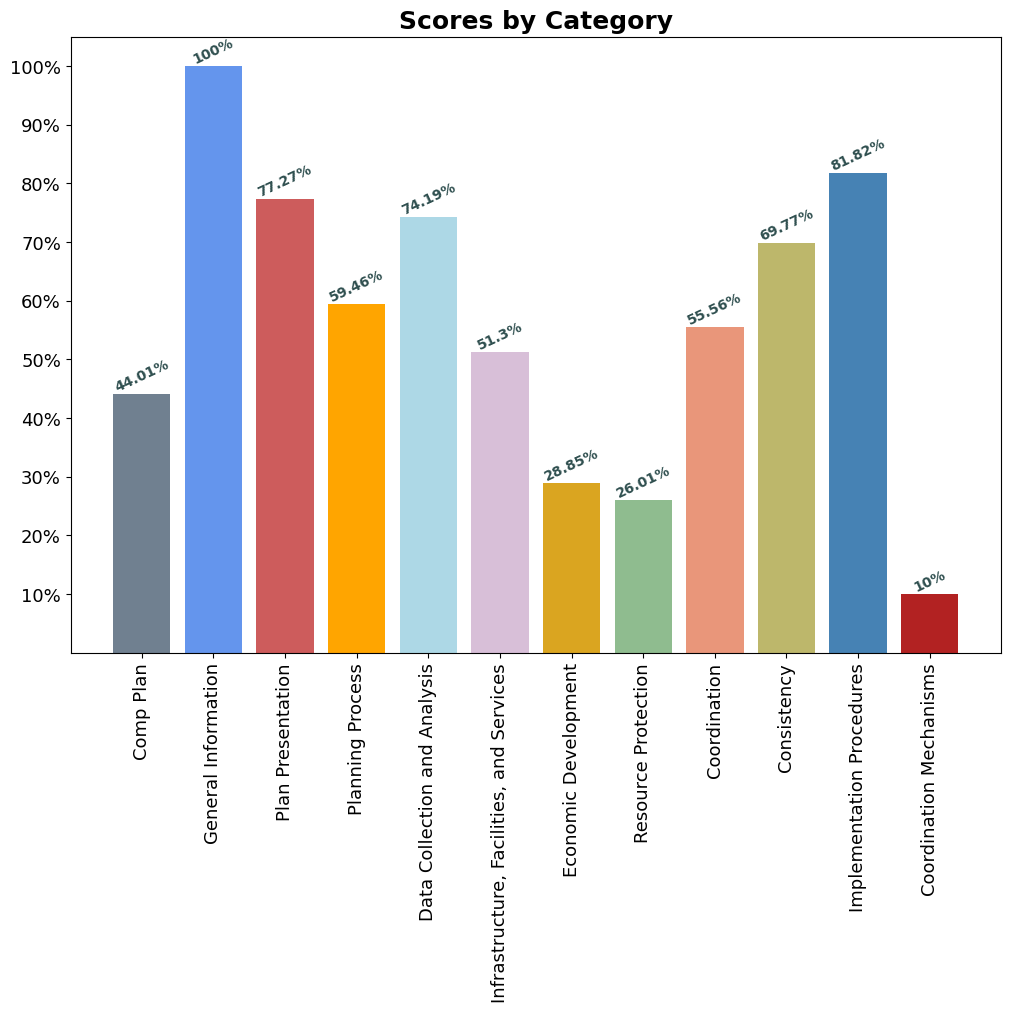

In [220]:
plt.figure(figsize=(12,8))
figure = plt.bar(score_arr['Category'], score_arr['Score'], color=colors, width=0.8)
plt.xticks(score_arr['Category'], cat_names, fontsize=13, rotation ='vertical');
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], scores, fontsize=13);
plt.title("Scores by Category", fontsize=18, fontweight='bold');
plt.bar_label(figure, percentages, label_type='edge', fontsize=10, color='darkslategrey', fontweight='bold',rotation=25);

##**Rankings by Category**
---
####**1. General Information - 100%**
####**2. Implementation Procedures - 81.82%**
####**3. Plan Presentation - 77.27%**
####**4. Data Collection and Analysis - 74.19%%**
####**5. Consistency - 69.77%**
####**6. Planning Process - 59.46%**
####**7. Coordination - 55.56%**
####**8. Infrastructure, Facilities, and Services - 51.3%**
####**9. Economic Development - 28.85%**
####**10. Resource Protection - 26.01%**
####**11. Coordination Mechanisms - 10%**

####***Comprehensive Plan Total Score - 44.01%***

##**Assessments vs Goals, Objectives, and Policies**
---

###**Category 5: Infrastructure, Facilities, and Services - Assessments**

In [221]:
cat5_assess = rescore.iloc[88:151]
#cat5_assess

In [222]:
cat5_assess_sum = int(cat5_assess['Code'].sum())
cat5_assess_total = int(cat5_assess['Code Total'].sum())
cat5_assess_score = cat5_assess_sum/cat5_assess_total
cat5_assess_score

0.5533333333333333

###**Category 5: Infrastructure, Facilities, and Services - Goals, Objectives, and Policies [All]**

In [223]:
cat5_goals = rescore.iloc[151:269]
#cat5_goals

In [224]:
cat5_goals_sum = int(cat5_goals['Code'].sum())
cat5_goals_total = int(cat5_goals['Code Total'].sum())
cat5_goals_score = cat5_goals_sum/cat5_goals_total
cat5_goals_score

0.4872881355932203

###**Category 5: Infrastructure, Facilities, and Services - Goals, Objectives, and Policies [Transportation and Access]**

In [225]:
cat5_goals1 = rescore.iloc[151:176]
#cat5_goals1

In [226]:
cat5_goals1_sum = int(cat5_goals1['Code'].sum())
cat5_goals1_total = int(cat5_goals1['Code Total'].sum())
cat5_goals1_score = cat5_goals1_sum/cat5_goals1_total
cat5_goals1_score

0.6

###**Category 5: Infrastructure, Facilities, and Services - Goals, Objectives, and Policies [Wastewater, Solid Waste, and Other Services]**

In [227]:
cat5_goals2 = rescore.iloc[176:198]
#cat5_goals2

In [228]:
cat5_goals2_sum = int(cat5_goals2['Code'].sum())
cat5_goals2_total = int(cat5_goals2['Code Total'].sum())
cat5_goals2_score = cat5_goals2_sum/cat5_goals2_total
cat5_goals2_score

0.36363636363636365

###**Category 5: Infrastructure, Facilities, and Services - Goals, Objectives, and Policies [Housing]**

In [229]:
cat5_goals3 = rescore.iloc[198:228]
#cat5_goals3

In [230]:
cat5_goals3_sum = int(cat5_goals3['Code'].sum())
cat5_goals3_total = int(cat5_goals3['Code Total'].sum())
cat5_goals3_score = cat5_goals3_sum/cat5_goals3_total
cat5_goals3_score

0.4666666666666667

###**Category 5: Infrastructure, Facilities, and Services - Goals, Objectives, and Policies [Neighborhoods and Local Character]**

In [231]:
cat5_goals4 = rescore.iloc[228:256]
#cat5_goals4

In [232]:
cat5_goals4_sum = int(cat5_goals4['Code'].sum())
cat5_goals4_total = int(cat5_goals4['Code Total'].sum())
cat5_goals4_score = cat5_goals4_sum/cat5_goals4_total
cat5_goals4_score

0.5714285714285714

###**Category 5: Infrastructure, Facilities, and Services - Goals, Objectives, and Policies [Historic Preservation]**

In [233]:
cat5_goals5 = rescore.iloc[256:269]
#cat5_goals5

In [234]:
cat5_goals5_sum = int(cat5_goals5['Code'].sum())
cat5_goals5_total = int(cat5_goals5['Code Total'].sum())
cat5_goals5_score = cat5_goals5_sum/cat5_goals5_total
cat5_goals5_score

0.34615384615384615

---

###**Category 6: Economic Development - Assessment**

In [235]:
cat6_assess = rescore.iloc[269:284]
#cat6_assess

In [236]:
cat6_assess_sum = int(cat6_assess['Code'].sum())
cat6_assess_total = int(cat6_assess['Code Total'].sum())
cat6_assess_score = cat6_assess_sum/cat6_assess_total
cat6_assess_score

0.25806451612903225

###**Category 6: Economic Development - Goals, Objectives, and Policies [All]**

In [237]:
cat6_goals = rescore.iloc[284:322]
#cat6_goals

In [238]:
cat6_goals_sum = int(cat6_goals['Code'].sum())
cat6_goals_total = int(cat6_goals['Code Total'].sum())
cat6_goals_score = cat6_goals_sum/cat6_goals_total
cat6_goals_score

0.3013698630136986

###**Category 6: Economic Development - Goals, Objectives, and Policies [Conventional Economic Development]**

In [239]:
cat6_goals1 = rescore.iloc[284:291]
#cat6_goals1

In [240]:
cat6_goals1_sum = int(cat6_goals1['Code'].sum())
cat6_goals1_total = int(cat6_goals1['Code Total'].sum())
cat6_goals1_score = cat6_goals1_sum/cat6_goals1_total
cat6_goals1_score

0.21428571428571427

###**Category 6: Economic Development - Goals, Objectives, and Policies [Sustainable Economic Development]**

In [241]:
cat6_goals2 = rescore.iloc[291:318]
#cat6_goals2

In [242]:
cat6_goals2_sum = int(cat6_goals2['Code'].sum())
cat6_goals2_total = int(cat6_goals2['Code Total'].sum())
cat6_goals2_score = cat6_goals2_sum/cat6_goals2_total
cat6_goals2_score

0.25925925925925924

###**Category 6: Economic Development - Goals, Objectives, and Policies [Emphasis of Economic Development]**

In [243]:
cat6_goals3 = rescore.iloc[318:322]
#cat6_goals3

In [244]:
cat6_goals3_sum = int(cat6_goals3['Code'].sum())
cat6_goals3_total = int(cat6_goals3['Code Total'].sum())
cat6_goals3_score = cat6_goals3_sum/cat6_goals3_total
cat6_goals3_score

1.0

---

###**Category 7: Resource Protection - Assessment**

In [245]:
cat7_assess = rescore.iloc[322:367]
#cat7_assess

In [246]:
cat7_assess_sum = int(cat7_assess['Code'].sum())
cat7_assess_total = int(cat7_assess['Code Total'].sum())
cat7_assess_score = cat7_assess_sum/cat7_assess_total
cat7_assess_score

0.21804511278195488

###**Category 7: Resource Protection - Goals, Objectives, and Policies [All]**

In [247]:
cat7_goals = rescore.iloc[367:462]
#cat7_goals

In [248]:
cat7_goals_sum = int(cat7_goals['Code'].sum())
cat7_goals_total = int(cat7_goals['Code Total'].sum())
cat7_goals_score = cat7_goals_sum/cat7_goals_total
cat7_goals_score

0.2894736842105263

###**Category 7: Resource Protection - Goals, Objectives, and Policies [Development]**

In [249]:
cat7_goals1 = rescore.iloc[367:388]
#cat7_goals1

In [250]:
cat7_goals1_sum = int(cat7_goals1['Code'].sum())
cat7_goals1_total = int(cat7_goals1['Code Total'].sum())
cat7_goals1_score = cat7_goals1_sum/cat7_goals1_total
cat7_goals1_score

0.30952380952380953

###**Category 7: Resource Protection - Goals, Objectives, and Policies [Natural Resources]**

In [251]:
cat7_goals2 = rescore.iloc[388:415]
#cat7_goals2

In [252]:
cat7_goals2_sum = int(cat7_goals2['Code'].sum())
cat7_goals2_total = int(cat7_goals2['Code Total'].sum())
cat7_goals2_score = cat7_goals2_sum/cat7_goals2_total
cat7_goals2_score

0.5

###**Category 7: Resource Protection - Goals, Objectives, and Policies [Resource Production]**

In [253]:
cat7_goals3 = rescore.iloc[415:433]
#cat7_goals3

In [254]:
cat7_goals3_sum = int(cat7_goals3['Code'].sum())
cat7_goals3_total = int(cat7_goals3['Code Total'].sum())
cat7_goals3_score = cat7_goals3_sum/cat7_goals3_total
cat7_goals3_score

0.1111111111111111

###**Category 7: Resource Protection - Goals, Objectives, and Policies [Water Quality]**

In [255]:
cat7_goals4 = rescore.iloc[433:450]
#cat7_goals4

In [256]:
cat7_goals4_sum = int(cat7_goals4['Code'].sum())
cat7_goals4_total = int(cat7_goals4['Code Total'].sum())
cat7_goals4_score = cat7_goals4_sum/cat7_goals4_total
cat7_goals4_score

0.3235294117647059

###**Category 7: Resource Protection - Goals, Objectives, and Policies [Coastal Resources]**

In [257]:
cat7_goals5 = rescore.iloc[450:462]
#cat7_goals5

In [258]:
cat7_goals5_sum = int(cat7_goals5['Code'].sum())
cat7_goals5_total = int(cat7_goals5['Code Total'].sum())
cat7_goals5_score = cat7_goals5_sum/cat7_goals5_total
cat7_goals5_score

0.0

---

In [259]:
score_arr2 = pd.DataFrame(['Infrastructure,\n Facilities,\n and Services', 'Economic\n Development', 'Resource\n Protection'], columns=['Category'])
score_arr2['Assessment Score'] = [cat5_assess_score, cat6_assess_score, cat7_assess_score]
score_arr2['Goals/Policies Score'] = [cat5_goals_score, cat6_goals_score, cat7_goals_score]
score_arr2

,Category,Assessment Score,Goals/Policies Score
0,"Infrastructure,\n Facilities,\n and Services",0.553333,0.487288
1,Economic\n Development,0.258065,0.301370
2,Resource\n Protection,0.218045,0.289474


In [260]:
colors2 = ['indianred', 'steelblue']
percentages2 = ['55.33%', '25.81%', '21.80%']
percentages3 = ['48.73%','30.14%', '28.95%']

<Figure size 1200x800 with 0 Axes>

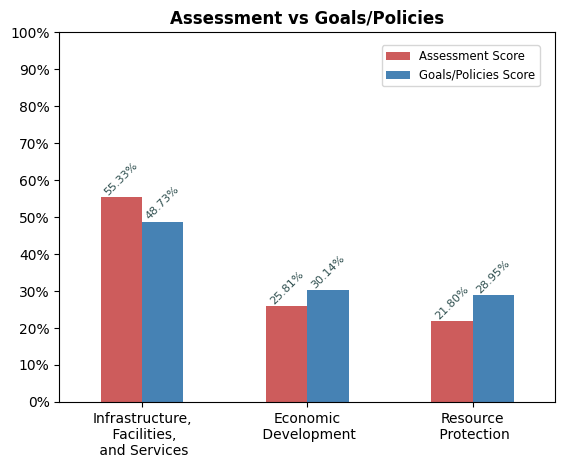

In [261]:
plt.figure(figsize=(12,8));
ax = score_arr2.plot(kind='bar', color=colors2, rot=0);
ax.legend(bbox_to_anchor=(0.98, 0.98), fontsize='small');
ax.xaxis.set_ticklabels(score_arr2['Category'], fontsize=10);
ax.set_title('Assessment vs Goals/Policies', fontweight='bold');
ax.set_yticks((0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0));
ax.set_yticklabels(('0%','10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'), rotation=0, fontsize=10);
ax.bar_label(ax.containers[0], percentages2, label_type='edge', fontsize=8, color='darkslategrey', rotation=45);
ax.bar_label(ax.containers[1], percentages3, label_type='edge', fontsize=8, color='darkslategrey', rotation=45);
plt.show();

---

In [262]:
cat5_arr = pd.DataFrame(['Assessment', 'Goals/Policies\n [All]', 'Goals/Policies\n [Transportation\n and Access]', 'Goals/Policies\n [Wastewater,\n Solid Waste,\n and Other Services]', 'Goals/Policies\n [Housing]', 'Goals/Policies\n [Neighborhoods\n and Local \nCharacter]', 'Goals/Policies\n [Local\n Preservation]'], columns=["Category"])
cat5_arr['Score'] = [cat5_assess_score, cat5_goals_score, cat5_goals1_score, cat5_goals2_score, cat5_goals3_score, cat5_goals4_score, cat5_goals5_score]

In [263]:
cat5_colors = ['darkslateblue', 'plum', 'Rebeccapurple', 'mediumpurple', 'mediumslateblue', 'thistle', 'slateblue']
cat5_percentages = ['55.33%','48.73%', '60%', '36.36%', '46.67%', '57.14%', '34.62%']

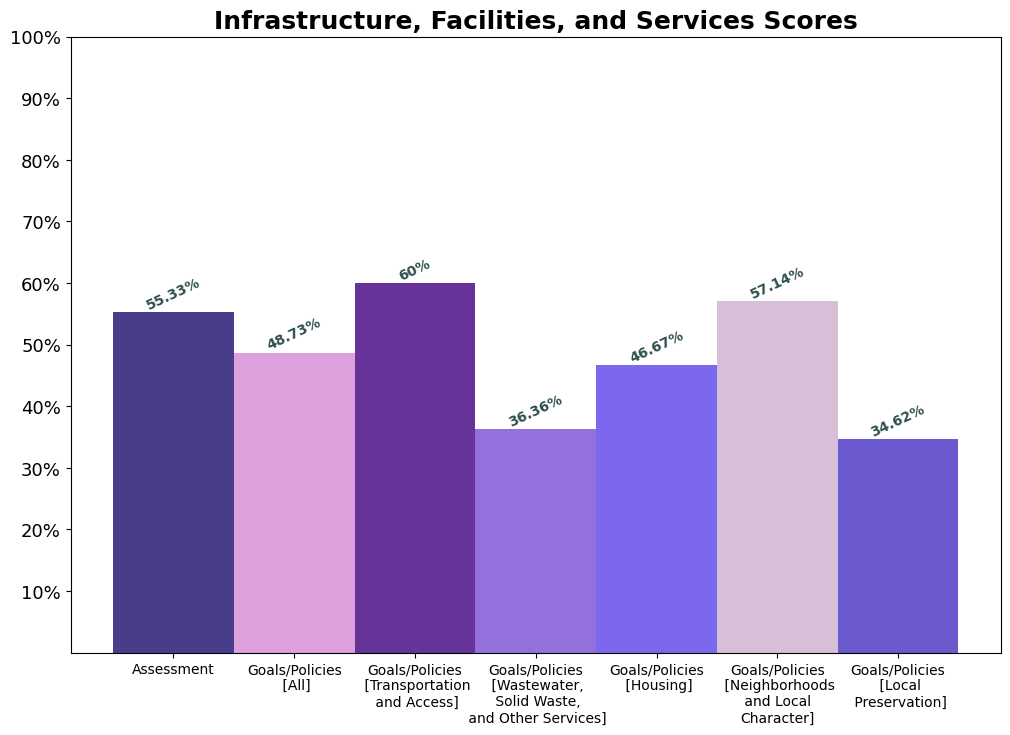

In [264]:
plt.figure(figsize=(12,8))
figure = plt.bar(cat5_arr['Category'], cat5_arr['Score'], color=cat5_colors, width=1.0)
plt.xticks(cat5_arr['Category'], cat5_arr['Category'], fontsize=10, rotation=0);
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], scores, fontsize=13);
plt.title("Infrastructure, Facilities, and Services Scores", fontsize=18, fontweight='bold');
plt.bar_label(figure, cat5_percentages, label_type='edge', fontsize=10, color='darkslategrey', fontweight='bold',rotation=25);

---

In [265]:
cat6_arr = pd.DataFrame(['Assessment', 'Goals/Policies\n [All]', 'Goals/Policies\n [Conventional\n Economic\n Development]', 'Goals/Policies\n [Sustainable\n Economic\n Development]', 'Goals/Policies\n [Emphasis of\n Economic\n Development]'], columns=["Category"])
cat6_arr['Score'] = [cat6_assess_score, cat6_goals_score, cat6_goals1_score, cat6_goals2_score, cat6_goals3_score,]
cat6_arr

,Category,Score
0,Assessment,0.258065
1,Goals/Policies\n [All],0.301370
2,Goals/Policies\n [Conventional\n Economic\n De...,0.214286
3,Goals/Policies\n [Sustainable\n Economic\n Dev...,0.259259
4,Goals/Policies\n [Emphasis of\n Economic\n Dev...,1.000000


In [266]:
cat6_colors = ['khaki', 'goldenrod', 'gold', 'darkgoldenrod', 'palegoldenrod']
cat6_percentages = ['25.81%','30.14%', '21.43%', '25.93%', '100%']

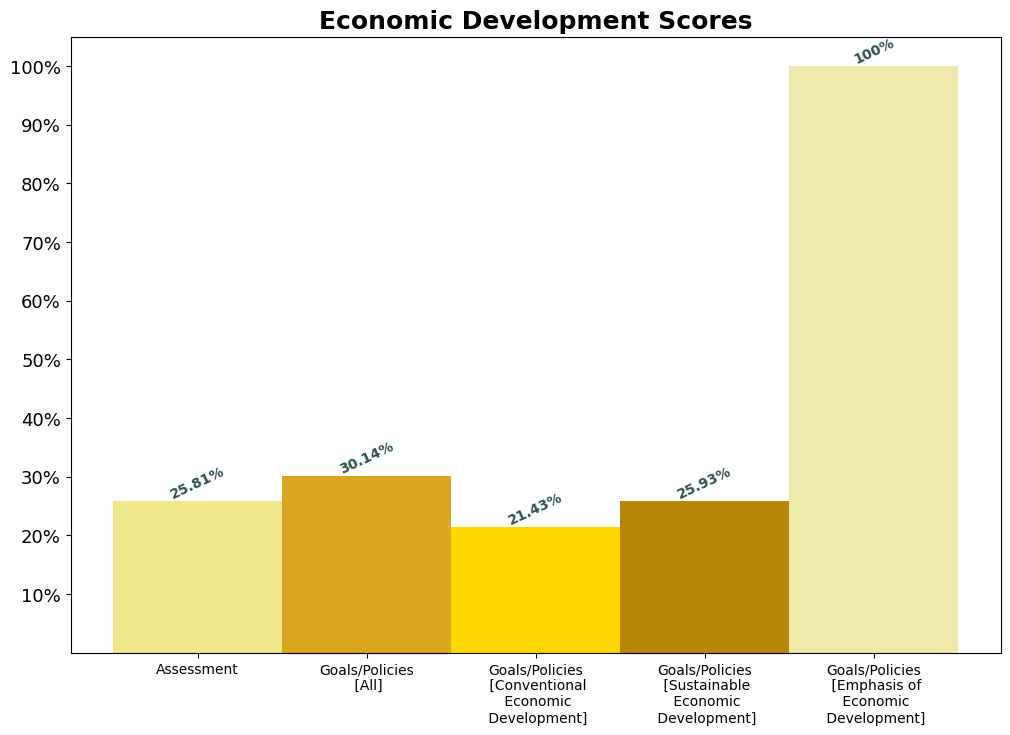

In [267]:
plt.figure(figsize=(12,8))
figure = plt.bar(cat6_arr['Category'], cat6_arr['Score'], color=cat6_colors, width=1.0)
plt.xticks(cat6_arr['Category'], cat6_arr['Category'], fontsize=10, rotation=0);
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], scores, fontsize=13);
plt.title("Economic Development Scores", fontsize=18, fontweight='bold');
plt.bar_label(figure, cat6_percentages, label_type='edge', fontsize=10, color='darkslategrey', fontweight='bold',rotation=25);

---

In [268]:
cat7_arr = pd.DataFrame(['Assessment', 'Goals/Policies\n [All]', 'Goals/Policies\n [Development]', 'Goals/Policies\n [Natural\n Resources]', 'Goals/Policies\n [Resource\n Production]', 'Goals/Policies\n [Water Quality]', 'Goals/Policies\n [Coastal\n Resources]'], columns=["Category"])
cat7_arr['Score'] = [cat7_assess_score, cat7_goals_score, cat7_goals1_score, cat7_goals2_score, cat7_goals3_score, cat7_goals4_score, cat7_goals5_score]

In [269]:
cat7_colors = ['darkkhaki', 'darkseagreen', 'olivedrab', 'forestgreen', 'darkolivegreen', 'seagreen', 'green']
cat7_percentages = ['21.8%', '28.95%', '30.95%', '50%', '11.11%', '32.35%', '0%']

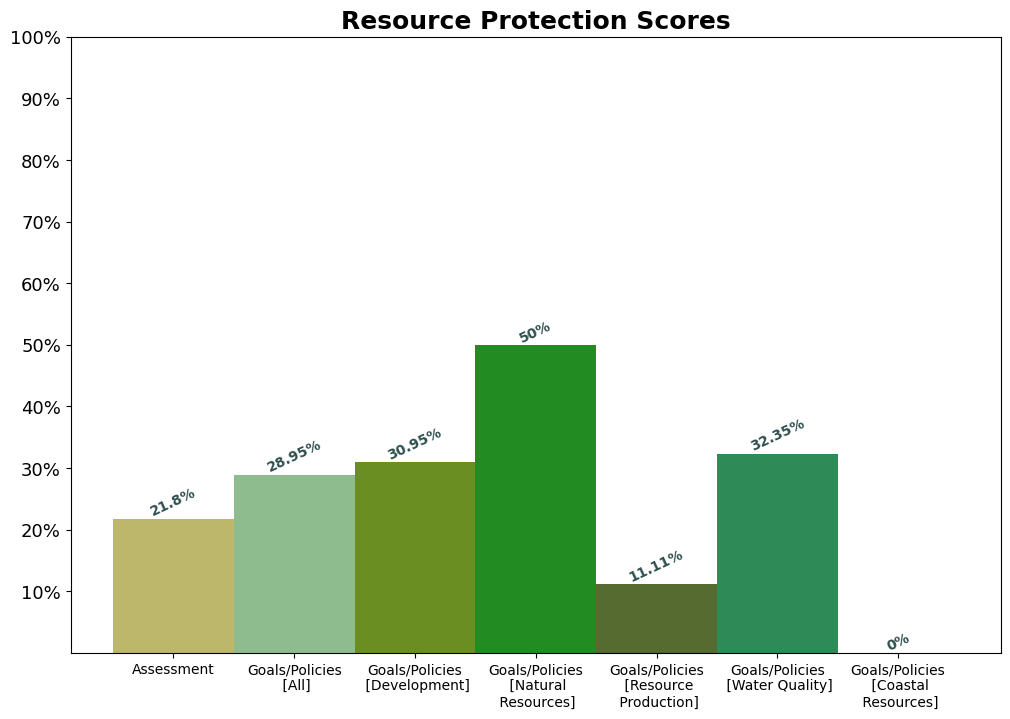

In [270]:
plt.figure(figsize=(12,8))
figure = plt.bar(cat7_arr['Category'], cat7_arr['Score'], color=cat7_colors, width=1.0)
plt.xticks(cat7_arr['Category'], cat7_arr['Category'], fontsize=10, rotation=0);
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], scores, fontsize=13);
plt.title("Resource Protection Scores", fontsize=18, fontweight='bold');
plt.bar_label(figure, cat7_percentages, label_type='edge', fontsize=10, color='darkslategrey', fontweight='bold',rotation=25);

##**Category Graphs by Section**
---

###**Category 2: Plan Presentation, Section 1: Supporting Components**

In [271]:
cat2_sec1 = rescore.iloc[3:12]
#cat2_sec1

In [272]:
cat2_sec1_sum = int(cat2_sec1['Code'].sum())
cat2_sec1_total = int(cat2_sec1['Code Total'].sum())
cat2_sec1_score = cat2_sec1_sum/cat2_sec1_total
cat2_sec1_score

0.7857142857142857

###**Category 2: Plan Presentation, Section 2: Statement of Goals, Objectives, and Policies**

In [273]:
cat2_sec2 = rescore.iloc[12:14]
#cat2_sec2

In [274]:
cat2_sec2_sum = int(cat2_sec2['Code'].sum())
cat2_sec2_total = int(cat2_sec2['Code Total'].sum())
cat2_sec2_score = cat2_sec2_sum/cat2_sec2_total
cat2_sec2_score

0.75

###**Category 3: Planning Process, Section 1: General**

In [275]:
cat3_sec1 = rescore.iloc[14:29]
#cat3_sec1

In [276]:
cat3_sec1_sum = int(cat3_sec1['Code'].sum())
cat3_sec1_total = int(cat3_sec1['Code Total'].sum())
cat3_sec1_score = cat3_sec1_sum/cat3_sec1_total
cat3_sec1_score

0.7333333333333333

###**Category 3: Planning Process, Section 2: Public Participation**

In [277]:
cat3_sec2 = rescore.iloc[29:68]
#cat3_sec2

In [278]:
cat3_sec2_sum = int(cat3_sec2['Code'].sum())
cat3_sec2_total = int(cat3_sec2['Code Total'].sum())
cat3_sec2_score = cat3_sec2_sum/cat3_sec2_total
cat3_sec2_score

0.5

###**Category 4: Data Collection and Analysis, Section 1: General**

In [279]:
cat4_sec1 = rescore.iloc[68:72]
cat4_sec1

,Section,Description,Code,Prescriptivity,Code Total,Pres. Total
71,4.0a,Summary of data collection and analysis process,1.0,NaN,1.0,NaN
72,4.0b,Equity Specific Analyses (excluding environmen...,1.0,NaN,3.0,NaN
73,4.0c,Vulnerability assessments,3.0,NaN,3.0,NaN
74,4.0d,"Health implications (life expectancy, asthma r...",3.0,NaN,3.0,NaN


In [280]:
cat4_sec1_sum = int(cat4_sec1['Code'].sum())
cat4_sec1_total = int(cat4_sec1['Code Total'].sum())
cat4_sec1_score = cat4_sec1_sum/cat4_sec1_total
cat4_sec1_score

0.8

###**Category 4: Data Collection and Analysis, Section 2: Existing Local Policies, Plans, and Background Studies**

In [281]:
cat4_sec2 = rescore.iloc[72:77]
cat4_sec2

,Section,Description,Code,Prescriptivity,Code Total,Pres. Total
75,4.1a,Past plan implementation status,0.0,NaN,1.0,NaN
76,4.1b,Assessment of past plan implementation effecti...,0.0,NaN,1.0,NaN
77,4.1c,"Current plans, policies, regulations",1.0,NaN,1.0,NaN
78,4.1d,Background studies / reports [discussed],1.0,NaN,1.0,NaN
79,4.1e,Background studies / reports [attached],NaN,NaN,1.0,NaN


In [282]:
cat4_sec2_sum = int(cat4_sec2['Code'].sum())
cat4_sec2_total = int(cat4_sec2['Code Total'].sum())
cat4_sec2_score = cat4_sec2_sum/cat4_sec2_total
cat4_sec2_score

0.4

###**Category 4: Data Collection and Analysis, Section 3: Present Conditions**

In [283]:
cat4_sec3 = rescore.iloc[77:88]
#cat4_sec3

In [284]:
cat4_sec3_sum = int(cat4_sec3['Code'].sum())
cat4_sec3_total = int(cat4_sec3['Code Total'].sum())
cat4_sec3_score = cat4_sec3_sum/cat4_sec3_total
cat4_sec3_score

0.8125

###**Category 8: Coordination, Section 1: Vertical Coordination**

In [285]:
cat8_sec1 = rescore.iloc[462:467]
cat8_sec1

,Section,Description,Code,Prescriptivity,Code Total,Pres. Total
465,8A.1,Coordination with federal agencies,1.0,1.0,2.0,2.0
466,8A.2,Coordination with state agencies,2.0,2.0,2.0,2.0
467,8A.3,Coordination with regional agencies,0.0,NaN,2.0,2.0
468,8A.4,Coordination with county agencies,0.0,NaN,2.0,2.0
469,8A.5,Coordination with special districts,0.0,NaN,2.0,2.0


In [286]:
cat8_sec1_sum = int(cat8_sec1['Code'].sum())
cat8_sec1_total = int(cat8_sec1['Code Total'].sum())
cat8_sec1_score = cat8_sec1_sum/cat8_sec1_total
cat8_sec1_score

0.3

###**Category 8: Coordination, Section 2: Horizontal Coordination**

In [287]:
cat8_sec2 = rescore.iloc[467:470]
cat8_sec2

,Section,Description,Code,Prescriptivity,Code Total,Pres. Total
470,8B.1,Coordination with surrounding municipalities,2.0,2.0,2.0,2.0
471,8B.2,Coordination with area non-profits,2.0,2.0,2.0,2.0
472,8B.3,Coordination with school districts,0.0,NaN,2.0,2.0


In [288]:
cat8_sec2_sum = int(cat8_sec2['Code'].sum())
cat8_sec2_total = int(cat8_sec2['Code Total'].sum())
cat8_sec2_score = cat8_sec2_sum/cat8_sec2_total
cat8_sec2_score

0.6666666666666666

###**Category 8: Coordination, Section 3: Internal Coordination**

In [289]:
cat8_sec3 = rescore.iloc[470:471]
cat8_sec3

,Section,Description,Code,Prescriptivity,Code Total,Pres. Total
473,8C.1,Coordination with other departments within the...,2.0,2.0,2.0,2.0


In [290]:
cat8_sec3_sum = int(cat8_sec3['Code'].sum())
cat8_sec3_total = int(cat8_sec3['Code Total'].sum())
cat8_sec3_score = cat8_sec3_sum/cat8_sec3_total
cat8_sec3_score

1.0

###**Category 8: Coordination, Section 4: Assessment During Planning Preparation**

In [291]:
cat8_sec4 = rescore.iloc[471:480]
cat8_sec4

,Section,Description,Code,Prescriptivity,Code Total,Pres. Total
474,8D.1,Federal agencies consulted prior-to and during...,0.0,NaN,2.0,NaN
475,8D.2,State agencies consulted prior-to and during p...,1.0,NaN,2.0,NaN
476,8D.3,County agencies consulted prior-to and during ...,2.0,NaN,2.0,NaN
477,8D.4,Regional agencies consulted prior-to and durin...,1.0,NaN,2.0,NaN
478,8D.5,Special districts consulted prior-to and durin...,2.0,NaN,2.0,NaN
479,8D.6,Surrounding municipalities consulted prior-to ...,1.0,NaN,2.0,NaN
480,8D.7,Area non-profits consulted prior-to and during...,2.0,NaN,2.0,NaN
481,8D.8,School districts consulted prior-to and during...,0.0,NaN,2.0,NaN
482,8D.9,Internal departments and agencies consulted pr...,2.0,NaN,2.0,NaN


In [292]:
cat8_sec4_sum = int(cat8_sec4['Code'].sum())
cat8_sec4_total = int(cat8_sec4['Code Total'].sum())
cat8_sec4_score = cat8_sec4_sum/cat8_sec4_total
cat8_sec4_score

0.6111111111111112

###**Category 9: Consistency, Section 1: Consistency with State-Mandated Plan Components**

In [293]:
cat9_sec1 = rescore.iloc[480:482]
cat9_sec1

,Section,Description,Code,Prescriptivity,Code Total,Pres. Total
483,9A,Does master plan refer to state plannning requ...,0.0,NaN,2.0,NaN
484,9A.1,Does the master plan provide an assessment of ...,0.0,NaN,2.0,NaN


In [294]:
cat9_sec1_sum = int(cat9_sec1['Code'].sum())
cat9_sec1_total = int(cat9_sec1['Code Total'].sum())
cat9_sec1_score = cat9_sec1_sum/cat9_sec1_total
cat9_sec1_score

0.0

###**Category 9: Consistency, Section 2: Vertical Consistency**

In [295]:
cat9_sec2 = rescore.iloc[482:485]
cat9_sec2

,Section,Description,Code,Prescriptivity,Code Total,Pres. Total
485,9B.1,Assessment of master plan consistency with sta...,2.0,NaN,2.0,NaN
486,9B.2,Assessment of master plan consistency with reg...,2.0,NaN,2.0,NaN
487,9B.3,Assessment of master plan consistency with cou...,2.0,NaN,2.0,NaN


In [296]:
cat9_sec2_sum = int(cat9_sec2['Code'].sum())
cat9_sec2_total = int(cat9_sec2['Code Total'].sum())
cat9_sec2_score = cat9_sec2_sum/cat9_sec2_total
cat9_sec2_score

1.0

###**Category 9: Consistency, Section 3: Horizontal Consistency**

In [297]:
cat9_sec3 = rescore.iloc[485:488]
cat9_sec3

,Section,Description,Code,Prescriptivity,Code Total,Pres. Total
488,9C.1,Assessment of master plan consistency with nei...,0.0,NaN,2.0,NaN
489,9C.2,Assessment of master plan consistency with sur...,0.0,NaN,2.0,NaN
490,9C.3,Assessment of master plan consistency with pol...,2.0,NaN,2.0,NaN


In [298]:
cat9_sec3_sum = int(cat9_sec3['Code'].sum())
cat9_sec3_total = int(cat9_sec3['Code Total'].sum())
cat9_sec3_score = cat9_sec3_sum/cat9_sec3_total
cat9_sec3_score

0.3333333333333333

###**Category 9: Consistency, Section 3: Internal Consistency**

In [299]:
cat9_sec4 = rescore.iloc[488:502]
#cat9_sec4

In [300]:
cat9_sec4_sum = int(cat9_sec4['Code'].sum())
cat9_sec4_total = int(cat9_sec4['Code Total'].sum())
cat9_sec4_score = cat9_sec4_sum/cat9_sec4_total
cat9_sec4_score

0.8148148148148148

---

In [301]:
cat8_arr = pd.DataFrame(['Coordination\n Total', 'Vertical\n Coordination', 'Horizontal\n Coordination', 'Internal\n Coordination', 'Assessment During\n Planning Preparation'], columns=["Category"])
cat8_arr['Score'] = [cat8_score, cat8_sec1_score, cat8_sec2_score, cat8_sec3_score, cat8_sec4_score]

In [302]:
cat8_colors = ['firebrick', 'lightcoral', 'brown', 'indianred', 'salmon', 'darksalmon']
cat8_percentages = ['55.56%','30%', '66.67%', '100%', '61.11%']

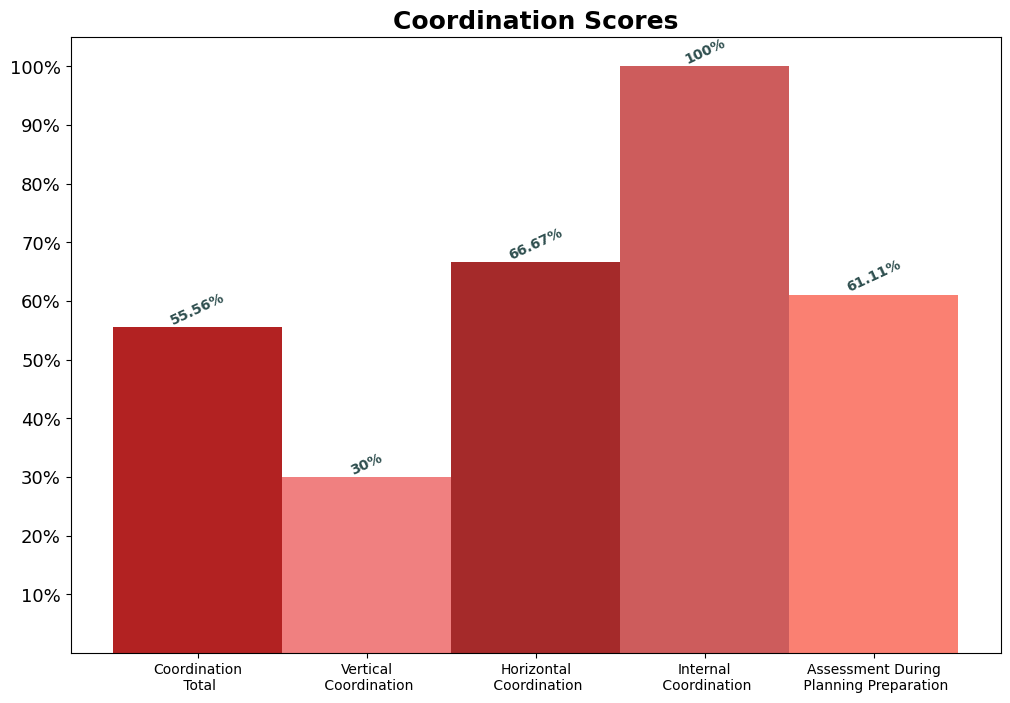

In [303]:
plt.figure(figsize=(12,8))
figure = plt.bar(cat8_arr['Category'], cat8_arr['Score'], color=cat8_colors, width=1.0)
plt.xticks(cat8_arr['Category'], cat8_arr['Category'], fontsize=10, rotation=0);
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], scores, fontsize=13);
plt.title("Coordination Scores", fontsize=18, fontweight='bold');
plt.bar_label(figure, cat8_percentages, label_type='edge', fontsize=10, color='darkslategrey', fontweight='bold',rotation=25);

---

In [304]:
cat9_arr = pd.DataFrame(['Consistency\n [All]', 'Consistency with\n State-Mandated\n Plan Components', 'Vertical\n Consistency', 'Horizontal\n Consistency', 'Internal\n Coordination'], columns=["Category"])
cat9_arr['Score'] = [cat9_score, cat9_sec1_score, cat9_sec2_score, cat9_sec3_score, cat9_sec4_score]
cat9_arr

,Category,Score
0,Consistency\n [All],0.697674
1,Consistency with\n State-Mandated\n Plan Compo...,0.000000
2,Vertical\n Consistency,1.000000
3,Horizontal\n Consistency,0.333333
4,Internal\n Coordination,0.814815


In [305]:
cat9_colors = ['darkkhaki', 'khaki', 'tan', 'sienna', 'darkgoldenrod', 'burlywood']
cat9_percentages = ['69.77%','0%', '100%', '33.33%', '81.48%']

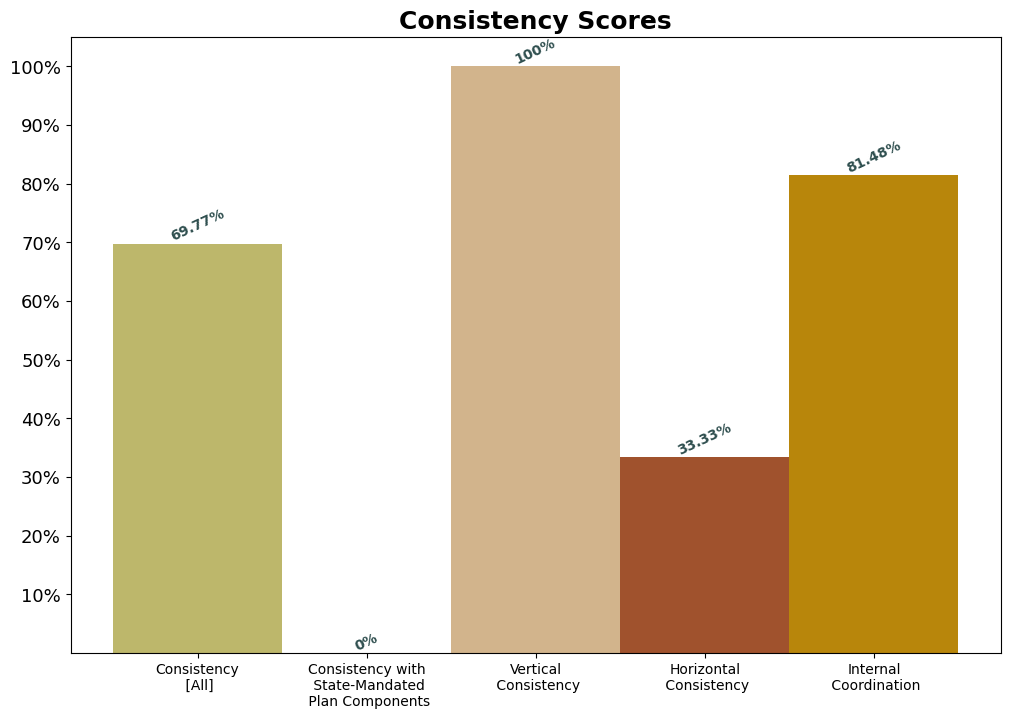

In [306]:
plt.figure(figsize=(12,8))
figure = plt.bar(cat9_arr['Category'], cat9_arr['Score'], color=cat9_colors, width=1.0);
plt.xticks(cat9_arr['Category'], cat9_arr['Category'], fontsize=10, rotation=0);
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], scores, fontsize=13);
plt.title("Consistency Scores", fontsize=18, fontweight='bold');
plt.bar_label(figure, cat9_percentages, label_type='edge', fontsize=10, color='darkslategrey', fontweight='bold',rotation=25);

---

In [331]:
rank_arr = pd.DataFrame(['General Information','Plan Presentation', 'Planning Process', 'Data Collection and Analysis', 'Infrastructure, Facilities, and Services', 'Economic Development', 'Resource Protection', 'Coordination', 'Consistency', 'Implementation Procedures', 'Coordination Mechanisms'], columns=["Category"])
rank_arr["Score"] = [cat1_score, cat2_score, cat3_score, cat4_score, cat5_score, cat6_score, cat7_score, cat8_score, cat9_score, cat10_score, cat11_score]
#rank_names = ['Comp Plan','General Information','Plan Presentation', 'Planning Process', 'Data Collection and Analysis', 'Infrastructure, Facilities, and Services', 'Economic Development', 'Resource Protection', 'Coordination', 'Consistency', 'Implementation Procedures', 'Coordination Mechanisms']
rank_percentages = ['10%', '26.01%', '28.85%', '51.3%', '55.56%', '59.46%', '69.77%', '74.19%', '77.27%', '81.82%', '100%']

rank_arr = rank_arr.sort_values('Score')
rank_colors = ['firebrick', 'darkseagreen', 'goldenrod', 'thistle', 'darksalmon', 'orange', 'darkkhaki', 'lightblue', 'indianred', 'steelblue', 'cornflowerblue']

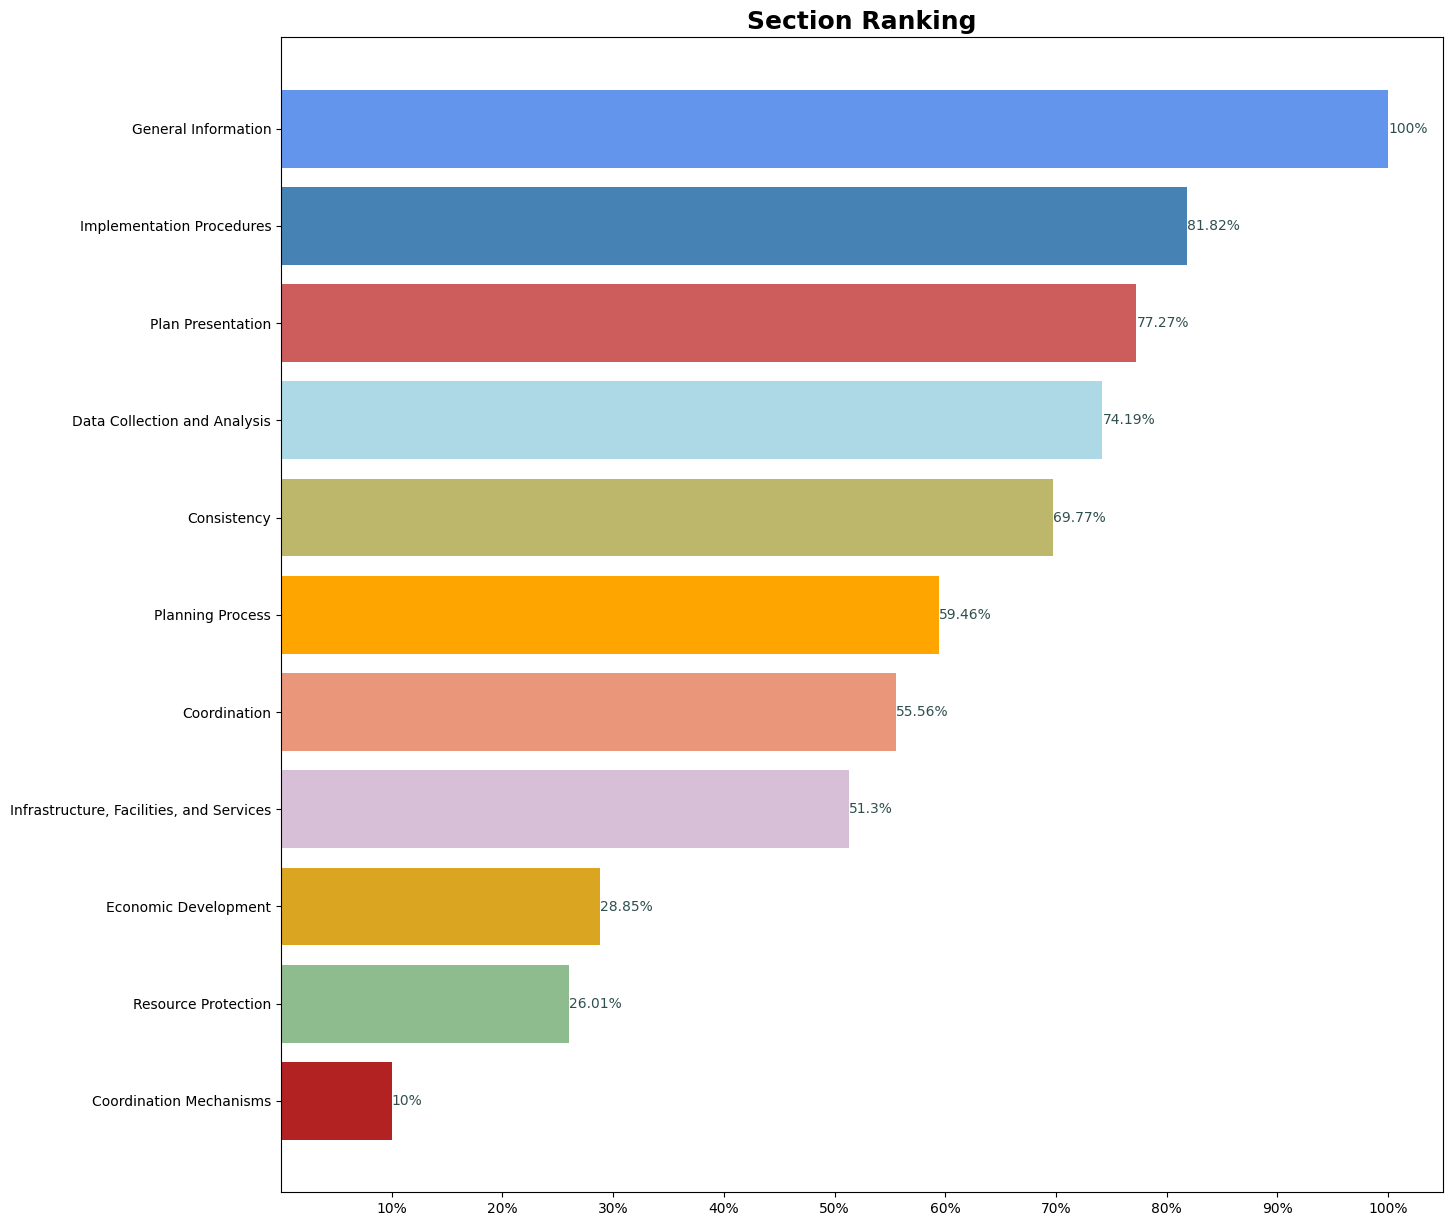

In [321]:
plt.figure(figsize=(15,15))
figure = plt.barh(rank_arr['Category'], rank_arr['Score'], color=rank_colors);
plt.xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], scores, fontsize=10);
plt.title("Section Ranking", fontsize=18, fontweight='bold');
plt.bar_label(figure, rank_percentages, label_type='edge', fontsize=10, color='darkslategrey');

In [332]:
rank2_arr = pd.DataFrame(['Comprehensive Plan','General Information','Plan Presentation', 'Planning Process', 'Data Collection and Analysis', 'Infrastructure, Facilities, and Services', 'Economic Development', 'Resource Protection', 'Coordination', 'Consistency', 'Implementation Procedures', 'Coordination Mechanisms'], columns=["Category"])
rank2_arr["Score"] = [code_score, cat1_score, cat2_score, cat3_score, cat4_score, cat5_score, cat6_score, cat7_score, cat8_score, cat9_score, cat10_score, cat11_score]
rank2_names = ['Comp Plan','General Information','Plan Presentation', 'Planning Process', 'Data Collection and Analysis', 'Infrastructure, Facilities, and Services', 'Economic Development', 'Resource Protection', 'Coordination', 'Consistency', 'Implementation Procedures', 'Coordination Mechanisms']
rank2_percentages = ['10%', '26.01%', '28.85%', '44.01%', '51.3%', '55.56%', '59.46%', '69.77%', '74.19%', '77.27%', '81.82%', '100%']

rank2_arr = rank2_arr.sort_values('Score')
rank2_colors = ['firebrick', 'darkseagreen', 'goldenrod', 'slategrey', 'thistle', 'darksalmon', 'orange', 'darkkhaki', 'lightblue', 'indianred', 'steelblue', 'cornflowerblue']

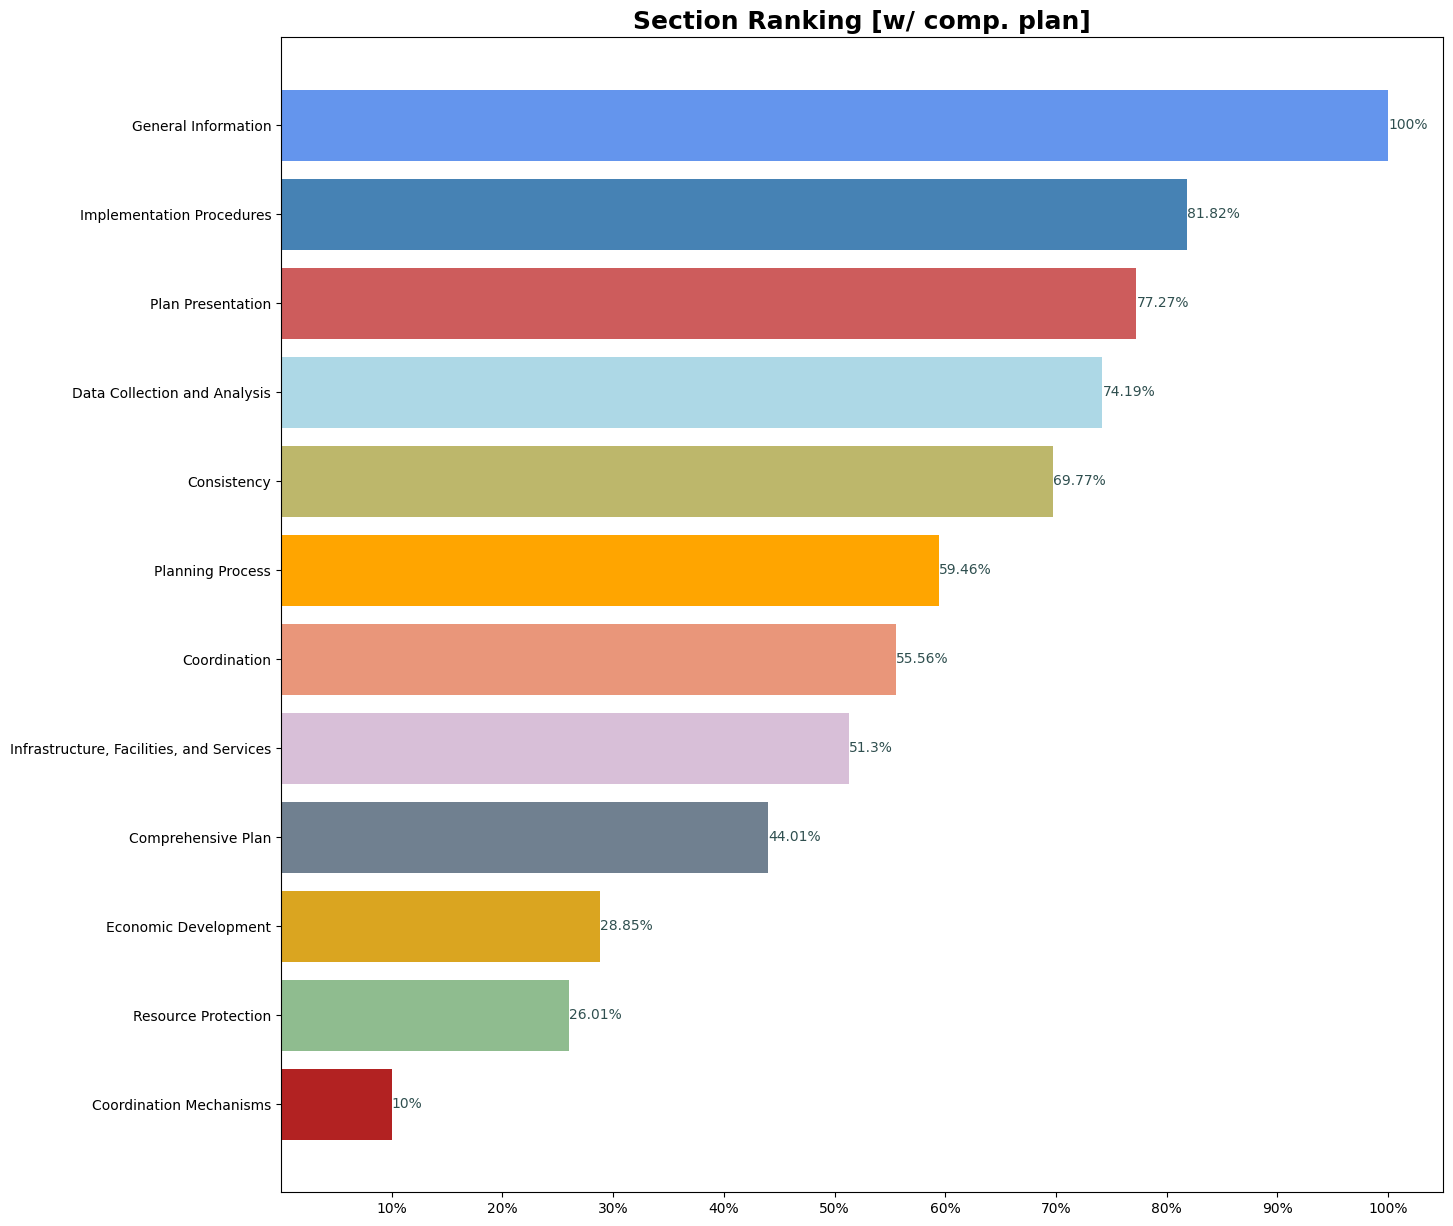

In [333]:
plt.figure(figsize=(15,15))
figure = plt.barh(rank2_arr['Category'], rank2_arr['Score'], color=rank2_colors);
plt.xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], scores, fontsize=10);
plt.title("Section Ranking [w/ comp. plan]", fontsize=18, fontweight='bold');
plt.bar_label(figure, rank2_percentages, label_type='edge', fontsize=10, color='darkslategrey');

In [310]:
comp_arr = pd.DataFrame(['General Information', 'Plan Presentation', 'Plan Presentaion - Supporting Components', 'Plan Presentation - Statement of Goals, Objectives, and Policies', 'Planning Process', 'Planning Process - General', 'Planning Process - Public Participation', 'Data Collection and Analysis', 'DC&A - General', 'DC&A - Existing Local Policies, Plans, and Background Studies', 'DC&A - Present Conditions', 'Infrastructure, Facilities, and Services', 'IF&S - Assessment', 'IF&S - Goals [All]', 'IF&S - Transportation and Access Goals', 'IF&S - Wastewater, Solid Waste, and Other Services Goals', 'IF&S - Housing Goals', 'IF&S - Neighborhood and Local Character Goals', 'IF&S - Historic Preservation Goals', 'Economic Development', 'ED - Assessment', 'ED - Goals [All]', 'ED - Conventional Economic Development Goals', 'ED - Sustainable Economic Goals', 'ED - Emphasis of Economic Development', 'Resource Protection', 'RP - Assessment', 'RP - Goals[All]', 'RP - Development', 'RP - Natural Resources', 'RP - Resource Production', 'RP - Water Quality', 'RP - Coastal Resources', 'Coordination', 'Coordination - Vertical Coordination', 'Coordination - Horizontal Coordination', 'Coordination - Internal Coordination', 'Coordination - Assessment During Planning Preparation', 'Consistency', 'Consistency - Consistency with State-Mandated Plan Components', 'Consistency - Vertical Consistency', 'Consistency - Horizontal Consistency', 'Consistency - Internal Consistency', 'Implementation Procedures', 'Coordination Mechanisms'], columns=['Category'])
comp_arr['Score'] = [cat1_score, cat2_score, cat2_sec1_score, cat2_sec2_score, cat3_score, cat3_sec1_score, cat3_sec2_score, cat4_score, cat4_sec1_score, cat4_sec2_score, cat4_sec3_score, cat5_score, cat5_assess_score, cat5_goals_score, cat5_goals1_score, cat5_goals2_score, cat5_goals3_score, cat5_goals4_score, cat5_goals5_score, cat6_score, cat6_assess_score, cat6_goals_score, cat6_goals1_score, cat6_goals2_score, cat6_goals3_score, cat7_score, cat7_assess_score, cat7_goals_score, cat7_goals1_score, cat7_goals2_score, cat7_goals3_score, cat7_goals4_score, cat7_goals5_score, cat8_score, cat8_sec1_score, cat8_sec2_score, cat8_sec3_score, cat8_sec4_score, cat9_score, cat9_sec1_score, cat9_sec2_score, cat9_sec3_score, cat9_sec4_score, cat10_score, cat11_score]
comp_arr = comp_arr.sort_values('Score')
comp_arr = comp_arr.reset_index()

In [311]:
comp_colors = ['darkkhaki', 'darkseagreen', 'firebrick', 'darkseagreen', 'goldenrod', 'darkseagreen', 'goldenrod', 'goldenrod', 'darkseagreen', 'goldenrod', 'darkseagreen', 'darksalmon', 'goldenrod', 'darkseagreen', 'darkseagreen', 'darkkhaki', 'thistle', 'thistle', 'lightblue', 'thistle', 'thistle', 'orange', 'darkseagreen', 'thistle', 'thistle', 'darksalmon', 'thistle', 'orange', 'thistle', 'darksalmon', 'darksalmon', 'darkkhaki', 'orange', 'lightblue', 'indianred', 'indianred', 'indianred', 'lightblue', 'lightblue', 'darkkhaki', 'steelblue', 'goldenrod', 'firebrick', 'darkkhaki', 'cornflowerblue']
comp_percentages = ['0%', '0%', '10%', '11.11%', '21.43%', '21.8%', '25.81%', '25.93%', '26.01%', '28.85%', '28.95%', '30%', '30.14%', '30.95%', '32.35%', '33.33%', '34.62%', '36.36%', '40%', '46.67%', '48.73%', '50%', '50%', '51.3%', '55.33%', '55.56%', '57.14%', '59.46%', '60%', '61.11%', '66.67%', '69.77%', '73.33%', '74.19%', '75%', '77.27%', '78.57%', '80%', '81.25%', '81.48%', '81.82%', '100%', '100%', '100%', '100%']

In [312]:
custom_lines = [Line2D([0], [0],color='cornflowerblue',lw=5),
                Line2D([0], [0], color='indianred',lw=5),
                Line2D([0], [0], color='orange',lw=5),
                Line2D([0], [0], color='lightblue',lw=5),
                Line2D([0], [0], color='thistle',lw=5),
                Line2D([0], [0], color='goldenrod',lw=5),
                Line2D([0], [0], color='darkseagreen',lw=5),
                Line2D([0], [0], color='darksalmon',lw=5),
                Line2D([0], [0], color='darkkhaki',lw=5),
                Line2D([0], [0], color='steelblue',lw=5),
                Line2D([0], [0], color='firebrick',lw=5)]

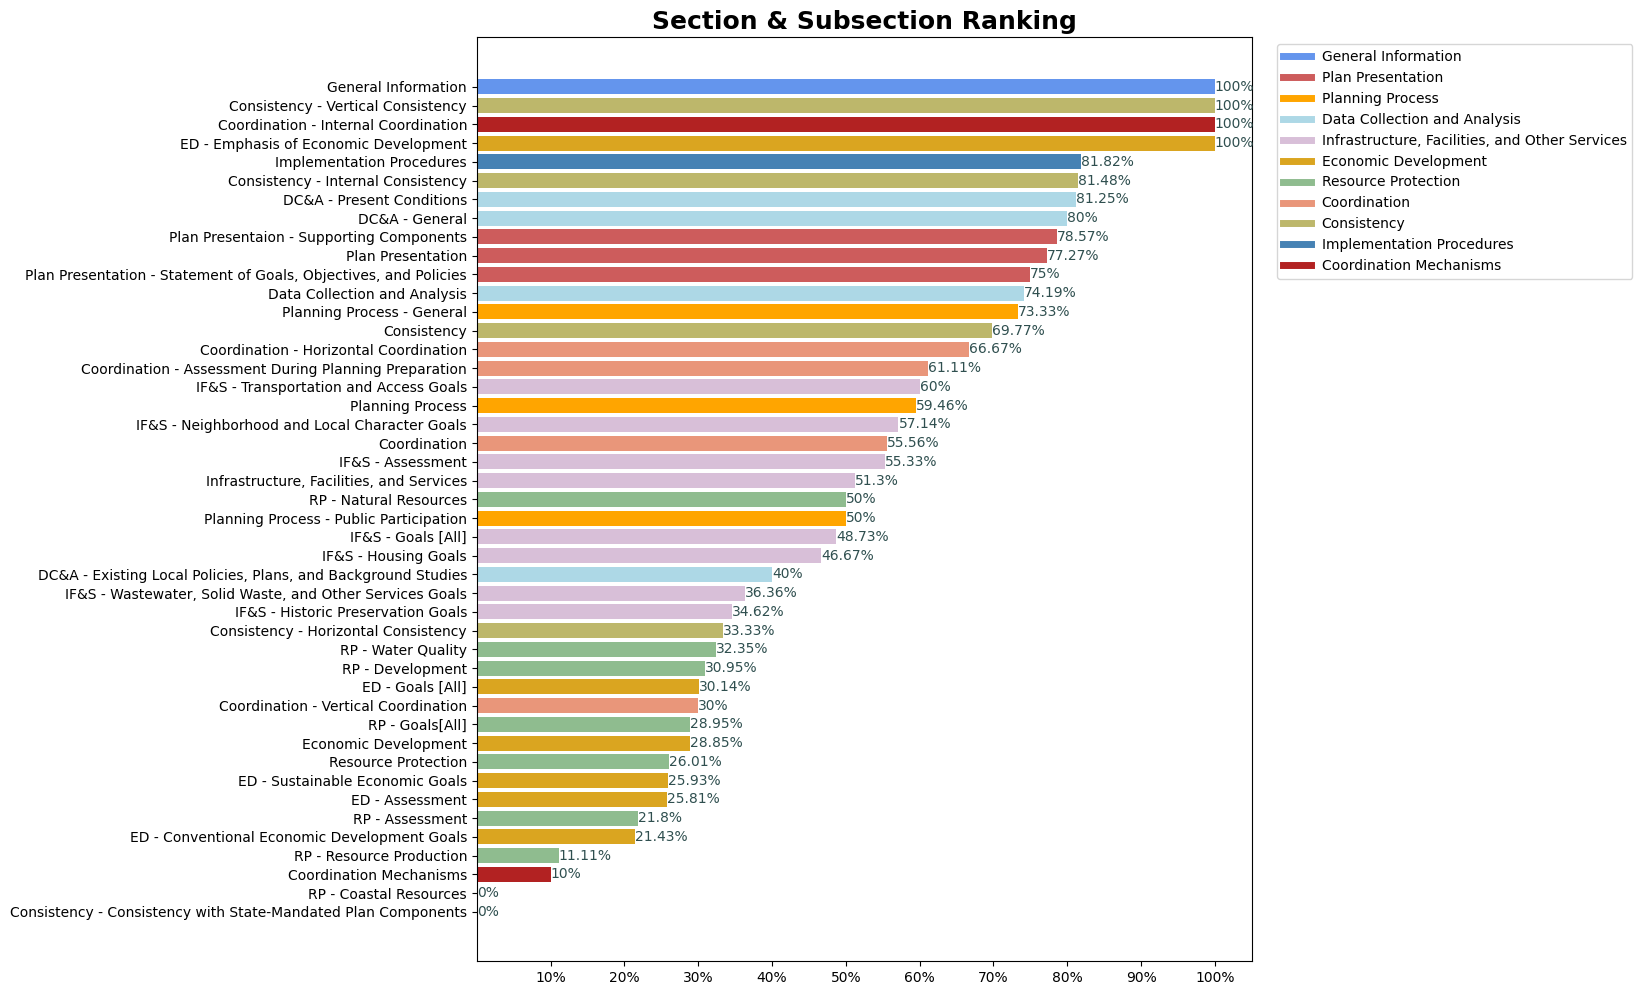

In [313]:
plt.figure(figsize=(10,12))
figure = plt.barh(comp_arr['Category'], comp_arr['Score'], color=comp_colors);
plt.xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], scores, fontsize=10);
plt.title("Section & Subsection Ranking", fontsize=18, fontweight='bold');
plt.legend(custom_lines, ['General Information', 'Plan Presentation', 'Planning Process', 'Data Collection and Analysis', 'Infrastructure, Facilities, and Other Services', 'Economic Development', 'Resource Protection', 'Coordination', 'Consistency', 'Implementation Procedures', 'Coordination Mechanisms'], bbox_to_anchor = (1.5,1), loc='upper right')
plt.bar_label(figure, comp_percentages, label_type='edge', fontsize=10, color='darkslategrey',rotation=0);

In [338]:
pp_colors = ['slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'brown', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey','slategrey','slategrey','slategrey']
pp_percentages = ['0%', '0%', '10%', '11.11%', '21.43%', '21.8%', '25.81%', '25.93%', '26.01%', '28.85%', '28.95%', '30%', '30.14%', '30.95%', '32.35%', '33.33%', '34.62%', '36.36%', '40%', '46.67%', '48.73%', '50%', '50%', '51.3%', '55.33%', '55.56%', '57.14%', '59.46%', '60%', '61.11%', '66.67%', '69.77%', '73.33%', '74.19%', '75%', '77.27%', '78.57%', '80%', '81.25%', '81.48%', '81.82%', '100%', '100%', '100%', '100%']

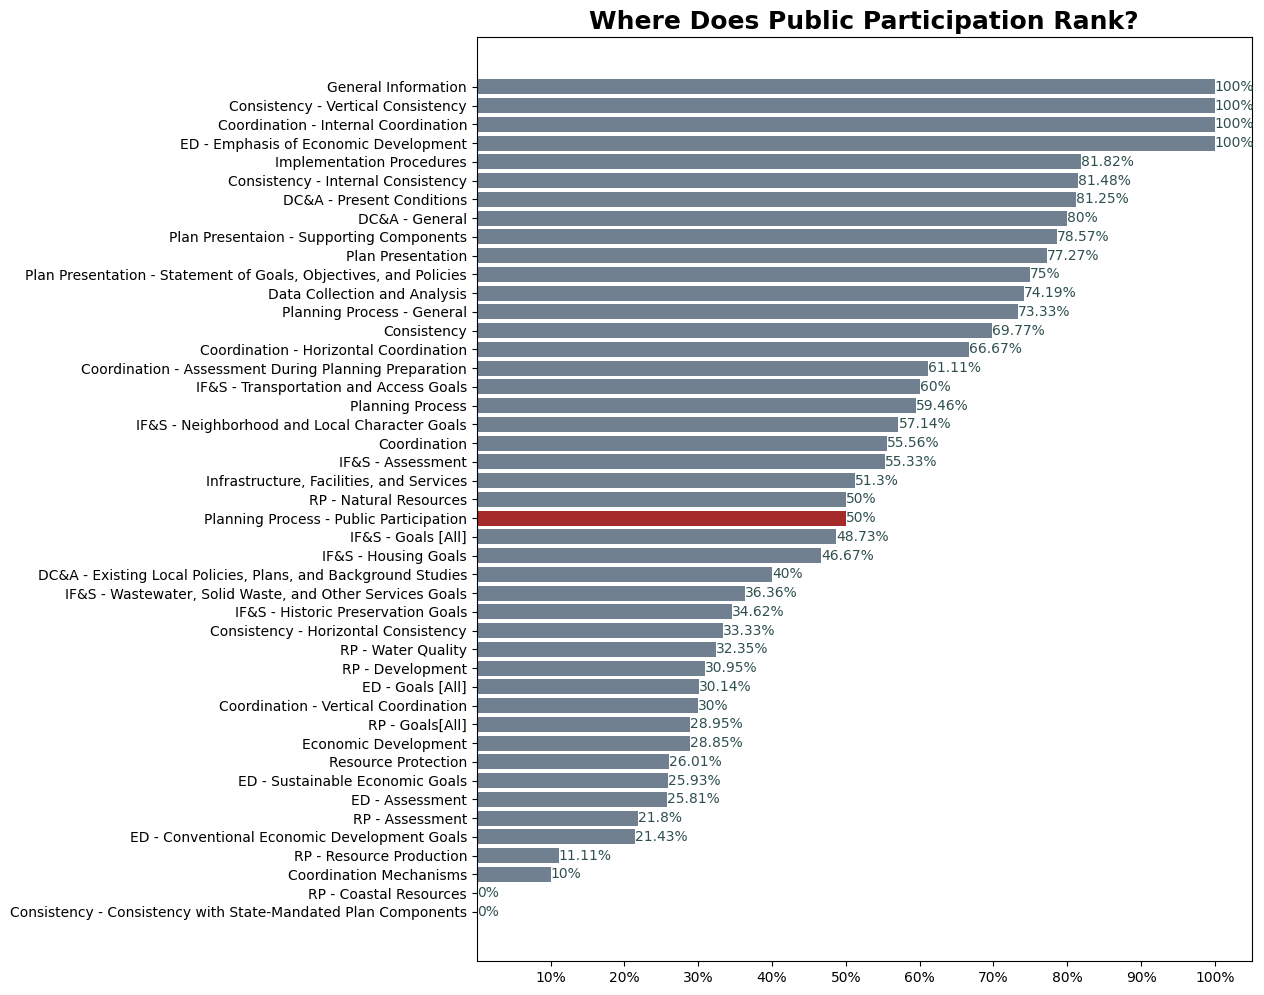

In [339]:
plt.figure(figsize=(10,12))
figure = plt.barh(comp_arr['Category'], comp_arr['Score'], color=pp_colors);
plt.xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], scores, fontsize=10);
plt.title("Where Does Public Participation Rank?", fontsize=18, fontweight='bold');
plt.bar_label(figure, pp_percentages, label_type='edge', fontsize=10, color='darkslategrey',rotation=0);

---

In [344]:
e_colors = ['slategrey', 'forestgreen', 'slategrey', 'forestgreen', 'slategrey', 'forestgreen', 'slategrey', 'forestgreen', 'forestgreen', 'slategrey', 'forestgreen', 'slategrey', 'slategrey', 'forestgreen', 'forestgreen', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'forestgreen', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey']
e_percentages = ['0%', '0%', '10%', '11.11%', '21.43%', '21.8%', '25.81%', '25.93%', '26.01%', '28.85%', '28.95%', '30%', '30.14%', '30.95%', '32.35%', '33.33%', '34.62%', '36.36%', '40%', '46.67%', '48.73%', '50%', '50%', '51.3%', '55.33%', '55.56%', '57.14%', '59.46%', '60%', '61.11%', '66.67%', '69.77%', '73.33%', '74.19%', '75%', '77.27%', '78.57%', '80%', '81.25%', '81.48%', '81.82%', '100%', '100%', '100%', '100%']

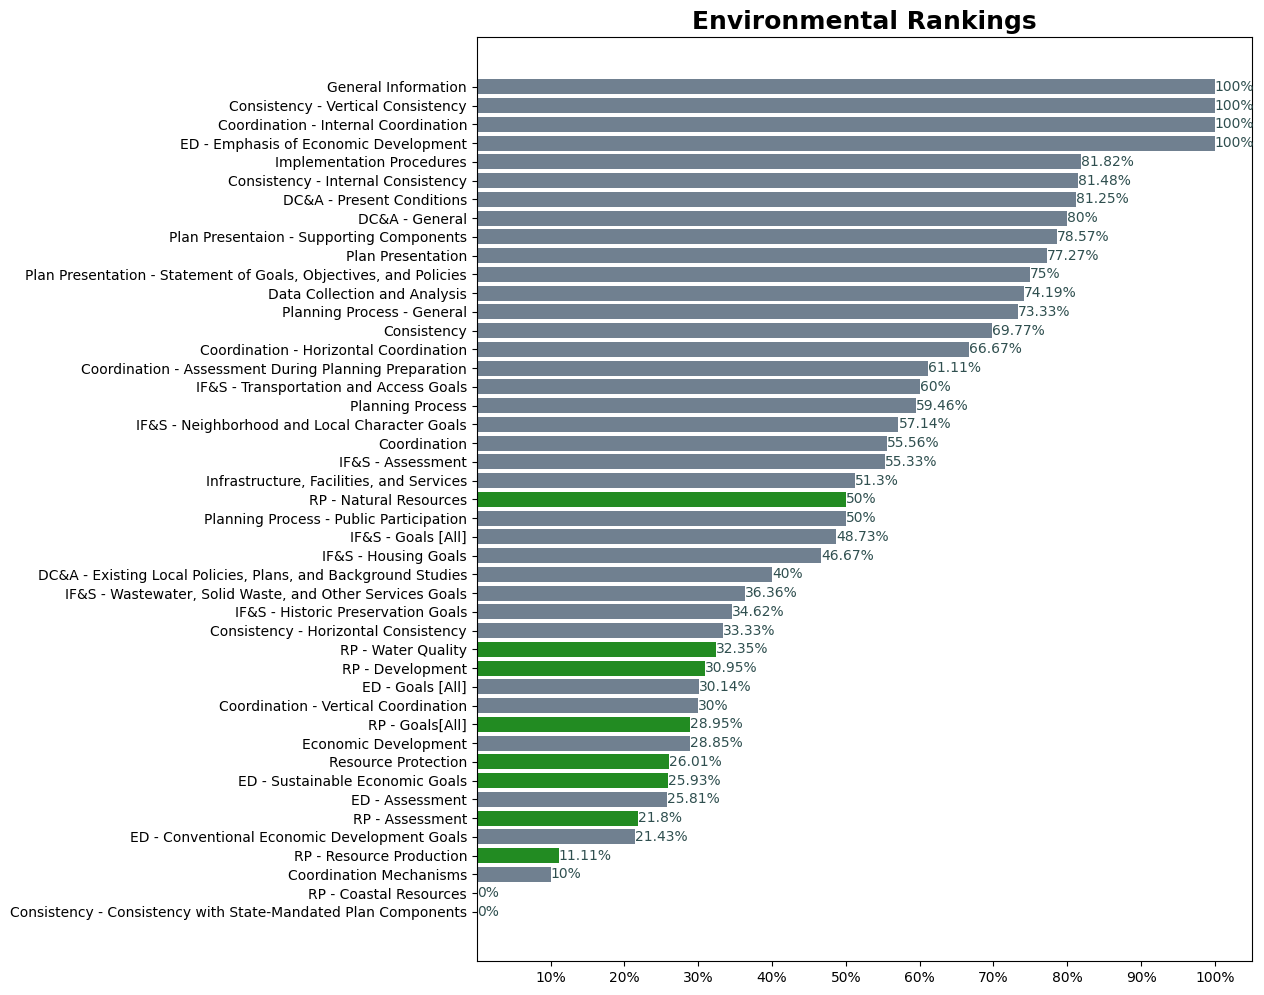

In [345]:
plt.figure(figsize=(10,12))
figure = plt.barh(comp_arr['Category'], comp_arr['Score'], color=e_colors);
plt.xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], scores, fontsize=10);
plt.title("Environmental Rankings", fontsize=18, fontweight='bold');
plt.bar_label(figure, e_percentages, label_type='edge', fontsize=10, color='darkslategrey',rotation=0);

---

In [349]:
gm_colors = ['slategrey', 'slategrey', 'slategrey', 'purple', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'purple', 'slategrey', 'slategrey', 'purple', 'purple', 'slategrey', 'purple', 'purple', 'slategrey', 'purple', 'purple', 'purple', 'slategrey', 'purple', 'slategrey', 'purple', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey']
gm_percentages = ['0%', '0%', '10%', '11.11%', '21.43%', '21.8%', '25.81%', '25.93%', '26.01%', '28.85%', '28.95%', '30%', '30.14%', '30.95%', '32.35%', '33.33%', '34.62%', '36.36%', '40%', '46.67%', '48.73%', '50%', '50%', '51.3%', '55.33%', '55.56%', '57.14%', '59.46%', '60%', '61.11%', '66.67%', '69.77%', '73.33%', '74.19%', '75%', '77.27%', '78.57%', '80%', '81.25%', '81.48%', '81.82%', '100%', '100%', '100%', '100%']

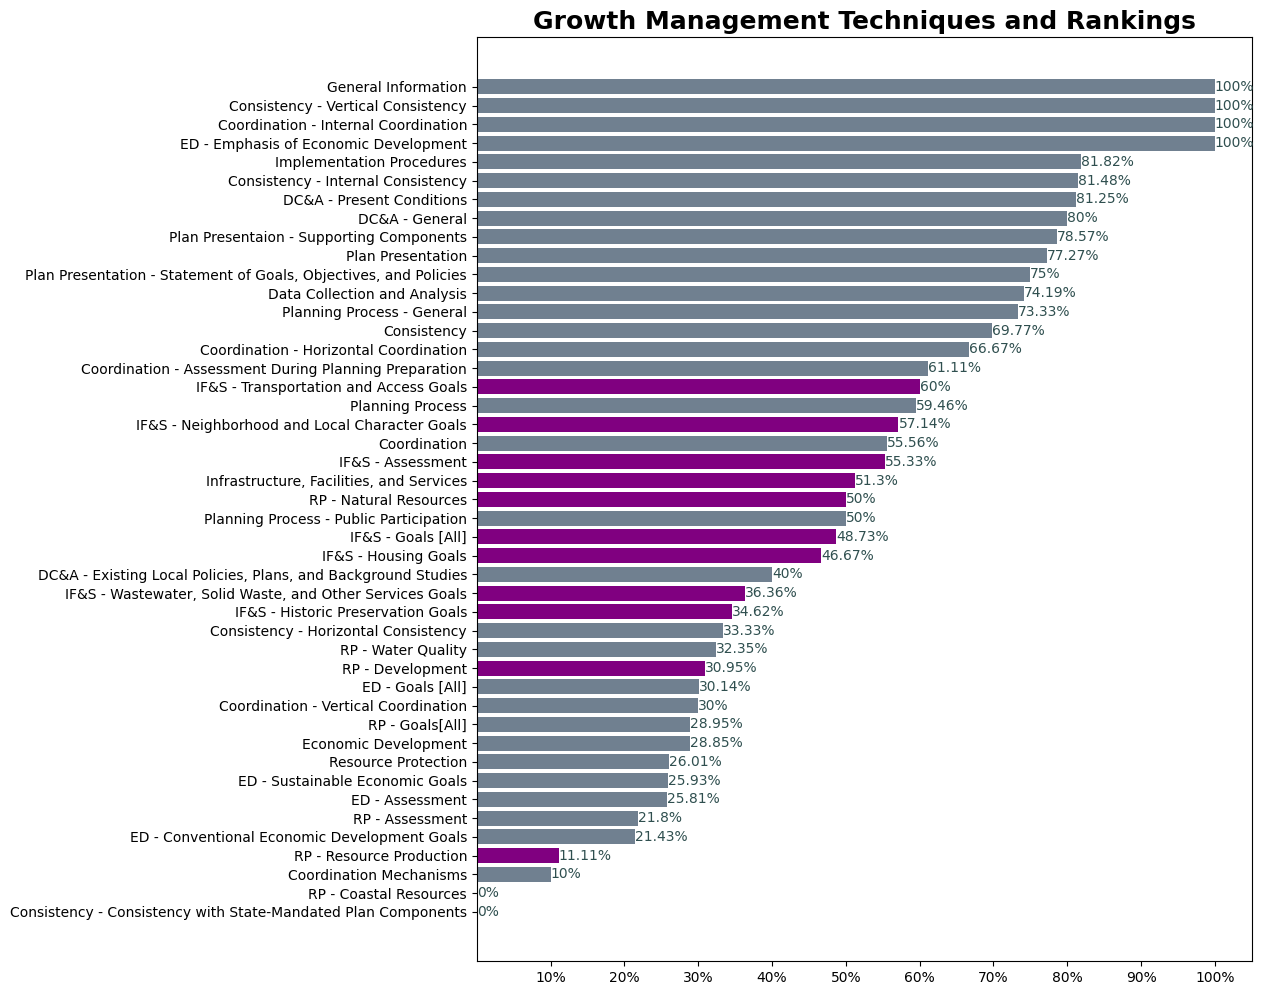

In [350]:
plt.figure(figsize=(10,12))
figure = plt.barh(comp_arr['Category'], comp_arr['Score'], color=gm_colors);
plt.xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], scores, fontsize=10);
plt.title("Growth Management Techniques and Rankings", fontsize=18, fontweight='bold');
plt.bar_label(figure, gm_percentages, label_type='edge', fontsize=10, color='darkslategrey',rotation=0);